<a href="https://colab.research.google.com/github/tilly963963/pytorch/blob/main/Chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [3]:
train_dataset = dsets.MNIST(root = './data',
              train = True,
              transform = transforms.ToTensor(),#把資料傳換
              download = True)#預設False
test_dataset = dsets.MNIST(root = './data',
              train = False,
              transform = transforms.ToTensor())#把資料傳換
               

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
import torch.utils.data as Data
import torch.nn as nn

In [5]:
num_epochs = 10
batch_size=100
learning_rate = 0.001
num_test_img = 5

In [6]:
train_loader = Data.DataLoader(dataset = train_dataset,
              batch_size = batch_size,
              shuffle = True)
test_loader = Data.DataLoader(dataset = test_dataset,
              batch_size = batch_size,
              shuffle = False)

In [7]:
class AutoEncoder(nn.Module):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.Tanh(),
        nn.Linear(128, 64),
        nn.Tanh(),
        nn.Linear(64, 12),
        nn.Tanh(),
        nn.Linear(12, 3),#長度為三的向量 類似把照片分三群
    )
    self.decoder = nn.Sequential(
        nn.Linear(3, 12),
        nn.Tanh(),
        nn.Linear(12, 64),
        nn.Tanh(),
        nn.Linear(64, 128),
        nn.Tanh(),
        nn.Linear(128, 28*28),
    )
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded,decoded

In [8]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable

In [9]:
autoencoder = AutoEncoder()
autoencoder

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): Tanh()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): Tanh()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784, bias=True)
  )
)

In [10]:
import torch.optim as opt

In [11]:
loss_fn = nn.MSELoss()
optimizer = opt.Adam(autoencoder.parameters(),lr=learning_rate)

In [12]:
view_data = Variable(test_dataset.data[:num_test_img].view(-1,28*28).type(torch.FloatTensor)/255.)
#真實

Epoch:1 , Loss:0.1256


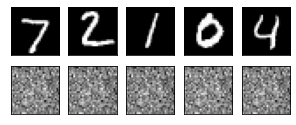

Epoch:1 , Loss:0.0537


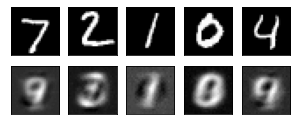

Epoch:1 , Loss:0.0539


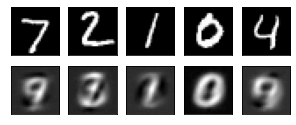

Epoch:1 , Loss:0.0551


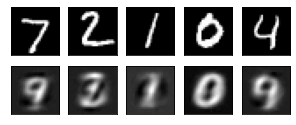

Epoch:1 , Loss:0.0515


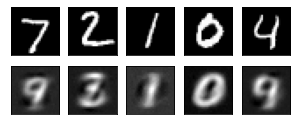

Epoch:1 , Loss:0.0484


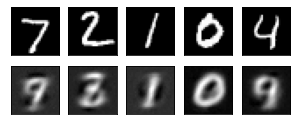

Epoch:2 , Loss:0.0506


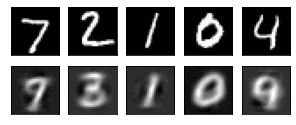

Epoch:2 , Loss:0.0465


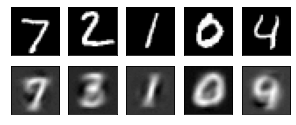

Epoch:2 , Loss:0.0428


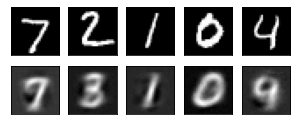

Epoch:2 , Loss:0.0458


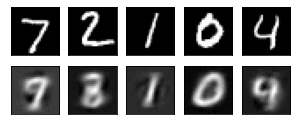

Epoch:2 , Loss:0.0467


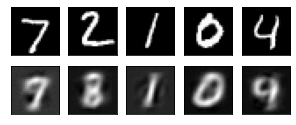

Epoch:2 , Loss:0.0427


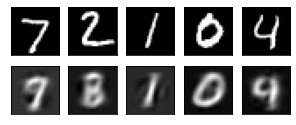

Epoch:3 , Loss:0.0432


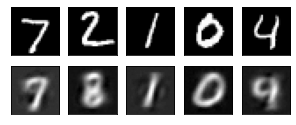

Epoch:3 , Loss:0.0444


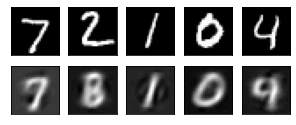

Epoch:3 , Loss:0.0435


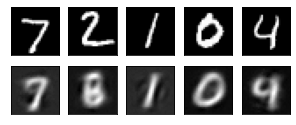

Epoch:3 , Loss:0.0402


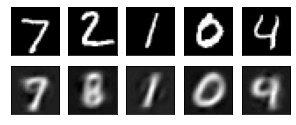

Epoch:3 , Loss:0.0411


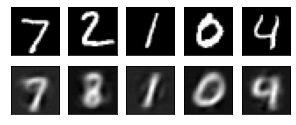

Epoch:3 , Loss:0.0426


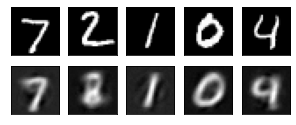

Epoch:4 , Loss:0.0389


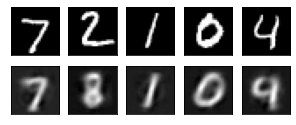

Epoch:4 , Loss:0.0428


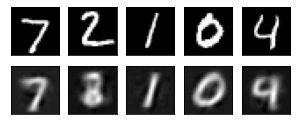

Epoch:4 , Loss:0.0401


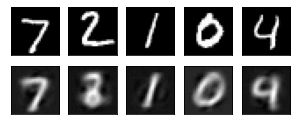

Epoch:4 , Loss:0.0406


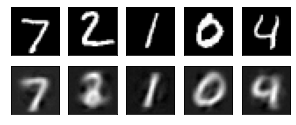

Epoch:4 , Loss:0.0423


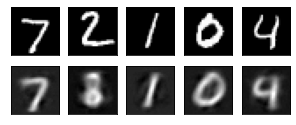

Epoch:4 , Loss:0.0406


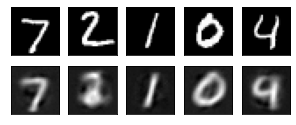

Epoch:5 , Loss:0.0375


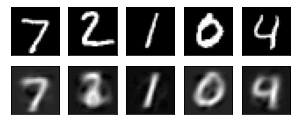

Epoch:5 , Loss:0.0380


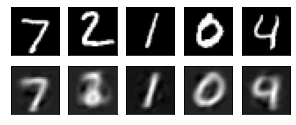

Epoch:5 , Loss:0.0413


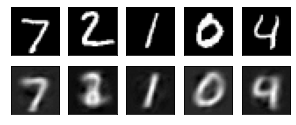

Epoch:5 , Loss:0.0395


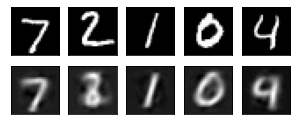

Epoch:5 , Loss:0.0386


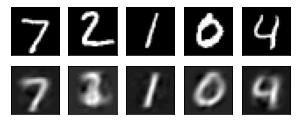

Epoch:5 , Loss:0.0401


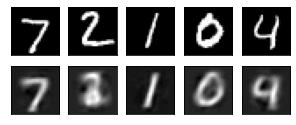

Epoch:6 , Loss:0.0374


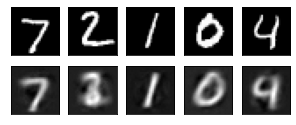

Epoch:6 , Loss:0.0390


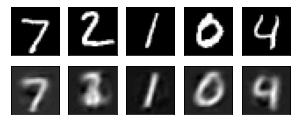

Epoch:6 , Loss:0.0404


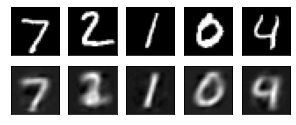

Epoch:6 , Loss:0.0374


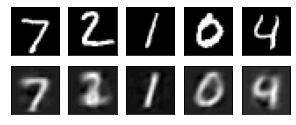

Epoch:6 , Loss:0.0362


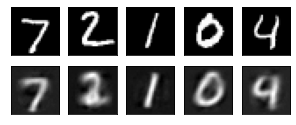

Epoch:6 , Loss:0.0375


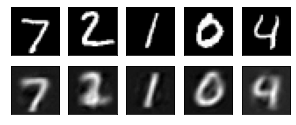

Epoch:7 , Loss:0.0352


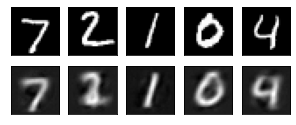

Epoch:7 , Loss:0.0352


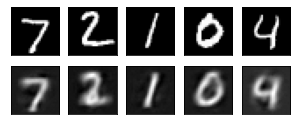

Epoch:7 , Loss:0.0351


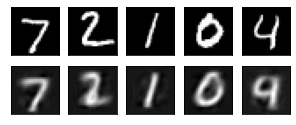

Epoch:7 , Loss:0.0377


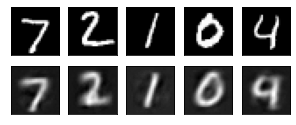

Epoch:7 , Loss:0.0405


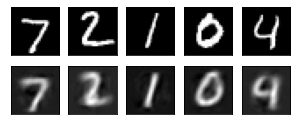

Epoch:7 , Loss:0.0372


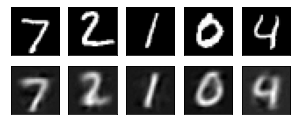

Epoch:8 , Loss:0.0383


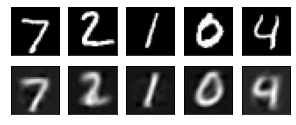

Epoch:8 , Loss:0.0351


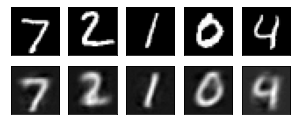

Epoch:8 , Loss:0.0353


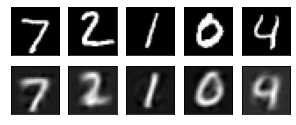

Epoch:8 , Loss:0.0381


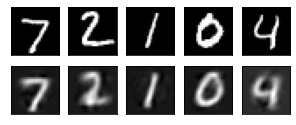

Epoch:8 , Loss:0.0364


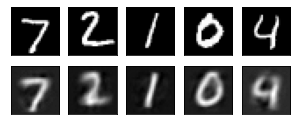

Epoch:8 , Loss:0.0374


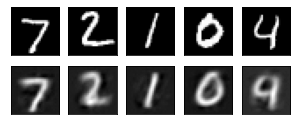

Epoch:9 , Loss:0.0372


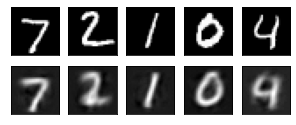

Epoch:9 , Loss:0.0348


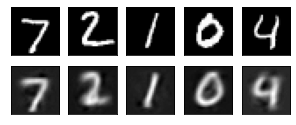

Epoch:9 , Loss:0.0356


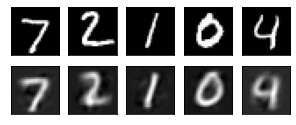

Epoch:9 , Loss:0.0361


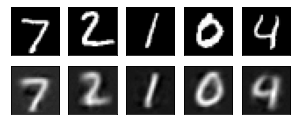

Epoch:9 , Loss:0.0339


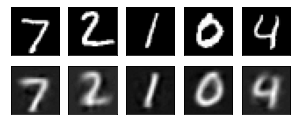

Epoch:9 , Loss:0.0378


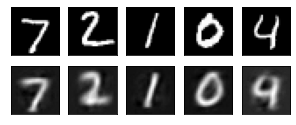

Epoch:10 , Loss:0.0353


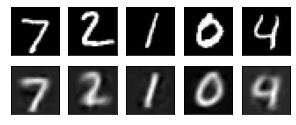

Epoch:10 , Loss:0.0360


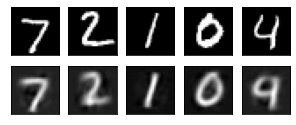

Epoch:10 , Loss:0.0371


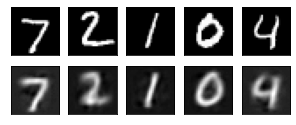

Epoch:10 , Loss:0.0360


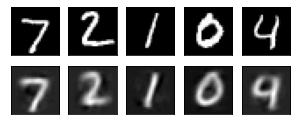

Epoch:10 , Loss:0.0382


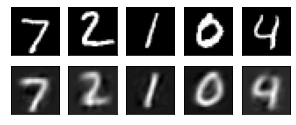

Epoch:10 , Loss:0.0362


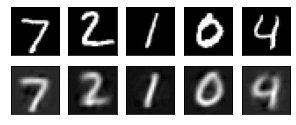

In [13]:
'''
mlp
只經過decoded
'''
for epoch in range(num_epochs):
  for i ,(x,y) in enumerate(train_loader):
    b_x = Variable(x.view(-1, 28*28))
    b_y = Variable(x.view(-1, 28*28))
    b_labels = Variable(y)

    optimizer.zero_grad()
    encoded , decoded = autoencoder(b_x)
    loss = loss_fn(decoded, b_y)
    loss.backward()
    optimizer.step()
    if (i)%100 == 0:
      print("Epoch:%d , Loss:%0.4f"%(epoch+1,loss.data))
      _, decoded_data = autoencoder(view_data)
      f, a = plt.subplots(2,num_test_img, figsize=(5,2))
      for j in range(num_test_img):
        a[0][j].imshow(np.reshape(view_data.data.numpy()[j],(28,28)),cmap='gray')
        a[0][j].set_xticks(())
        a[0][j].set_yticks(())

        a[1][j].imshow(np.reshape(decoded_data.data.numpy()[j],(28,28)),cmap='gray')
        a[1][j].set_xticks(())
        a[1][j].set_yticks(())
      
      plt.draw()
      plt.show()

In [14]:
m = nn.ConvTranspose2d(1,1,kernel_size=2,stride=2)#deconv 把原本圖放大兩倍
a = torch.FloatTensor([[[[1,2,3],[4,5,6],[7,8,9]]]])
a.shape

torch.Size([1, 1, 3, 3])

In [15]:
b = m(a)
print(b.shape)
print(b)

torch.Size([1, 1, 6, 6])
tensor([[[[-0.1537, -0.6161,  0.1048, -0.8200,  0.3633, -1.0239],
          [-0.6114, -0.3076, -0.8106, -0.2030, -1.0099, -0.0983],
          [ 0.6218, -1.2277,  0.8803, -1.4316,  1.1388, -1.6355],
          [-1.2091,  0.0063, -1.4083,  0.1109, -1.6075,  0.2155],
          [ 1.3972, -1.8394,  1.6557, -2.0433,  1.9142, -2.2472],
          [-1.8067,  0.3202, -2.0059,  0.4248, -2.2051,  0.5294]]]],
       grad_fn=<SlowConvTranspose2DBackward>)


In [17]:
class AutoEncoderCNN(nn.Module):
  def __init__(self):
    super(AutoEncoderCNN, self).__init__()
    self.encoder = nn.Sequential(
        nn.Conv2d(1,16,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2),
        
        nn.Conv2d(16,32,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2),
        
        nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=7,stride=2),#圖大小1x1 channel=64
        
    )

    self.decoder =nn.Sequential(
        nn.ConvTranspose2d(64,32,kernel_size=7,stride=1), 
        nn.ReLU(),
        
        nn.ConvTranspose2d(32,16,kernel_size=2,stride=2), 
        nn.ReLU(),

        nn.ConvTranspose2d(16,1,kernel_size=2,stride=2), 
        nn.Sigmoid()#為甚麼是Sigmoid
    )
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded,decoded

In [21]:
autoencoderCNN = AutoEncoderCNN()
autoencoderCNN.cuda()

AutoEncoderCNN(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=7, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 16, kernel_size=(2, 2), stride=(2, 2))
    (3): ReLU()
    (4): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
    (5): Sigmoid()
  )
)

In [25]:
import torch.optim as opt

In [36]:
view_data = Variable(test_dataset.data[:num_test_img].view(-1,1,28,28).type(torch.cuda.FloatTensor)/255.)
#真實

In [33]:
loss_fn = nn.MSELoss()
optimizer = opt.Adam(autoencoderCNN.parameters(),lr=learning_rate)

Epoch:1 , Loss:0.2027


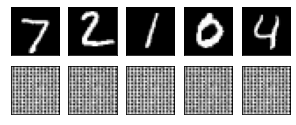

Epoch:1 , Loss:0.0766


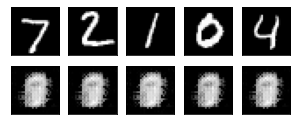

Epoch:1 , Loss:0.0721


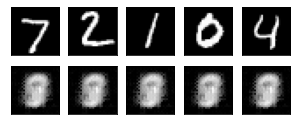

Epoch:1 , Loss:0.0709


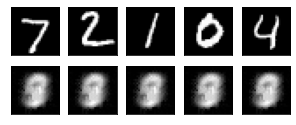

Epoch:1 , Loss:0.0644


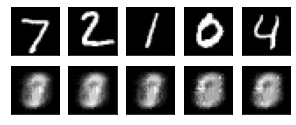

Epoch:1 , Loss:0.0591


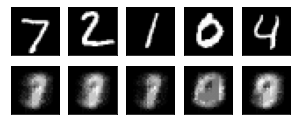

Epoch:2 , Loss:0.0547


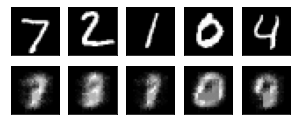

Epoch:2 , Loss:0.0497


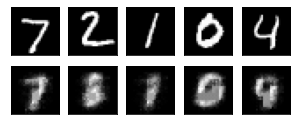

Epoch:2 , Loss:0.0499


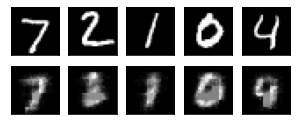

Epoch:2 , Loss:0.0461


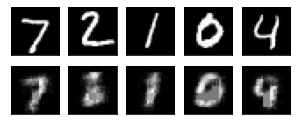

Epoch:2 , Loss:0.0453


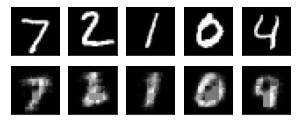

Epoch:2 , Loss:0.0407


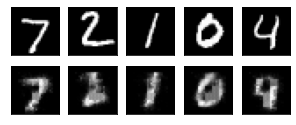

Epoch:3 , Loss:0.0400


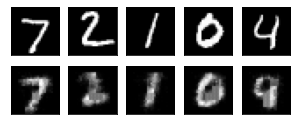

Epoch:3 , Loss:0.0388


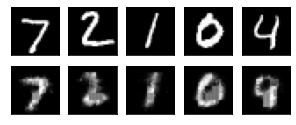

Epoch:3 , Loss:0.0404


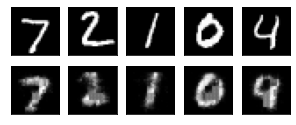

Epoch:3 , Loss:0.0367


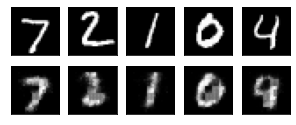

Epoch:3 , Loss:0.0356


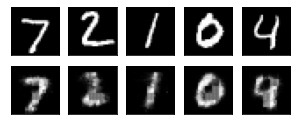

Epoch:3 , Loss:0.0361


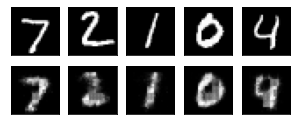

Epoch:4 , Loss:0.0344


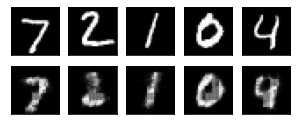

Epoch:4 , Loss:0.0353


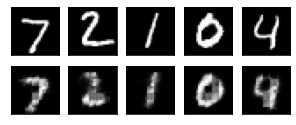

Epoch:4 , Loss:0.0343


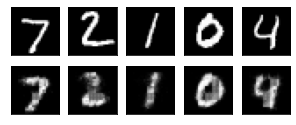

Epoch:4 , Loss:0.0339


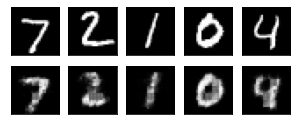

Epoch:4 , Loss:0.0341


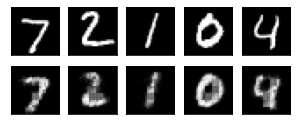

Epoch:4 , Loss:0.0331


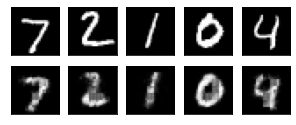

Epoch:5 , Loss:0.0319


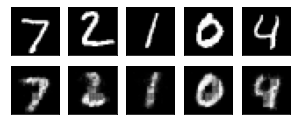

Epoch:5 , Loss:0.0329


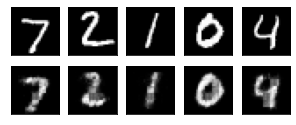

Epoch:5 , Loss:0.0322


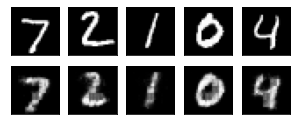

Epoch:5 , Loss:0.0324


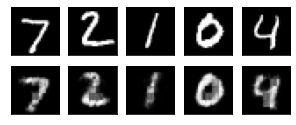

Epoch:5 , Loss:0.0293


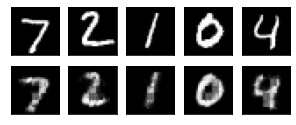

Epoch:5 , Loss:0.0297


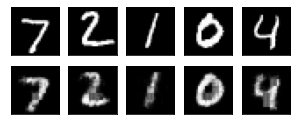

Epoch:6 , Loss:0.0286


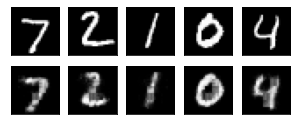

Epoch:6 , Loss:0.0278


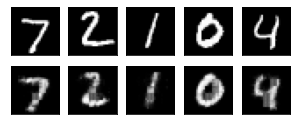

Epoch:6 , Loss:0.0308


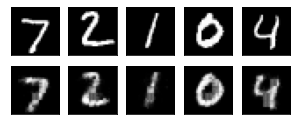

Epoch:6 , Loss:0.0308


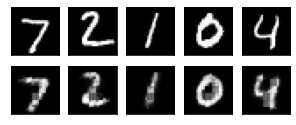

Epoch:6 , Loss:0.0305


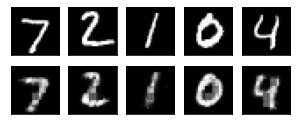

Epoch:6 , Loss:0.0256


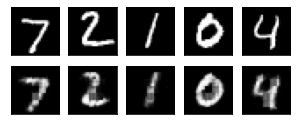

Epoch:7 , Loss:0.0282


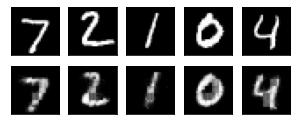

Epoch:7 , Loss:0.0295


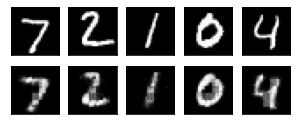

Epoch:7 , Loss:0.0274


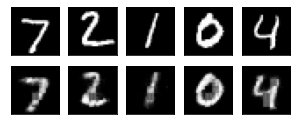

Epoch:7 , Loss:0.0269


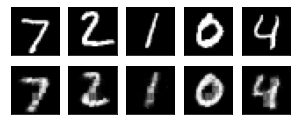

Epoch:7 , Loss:0.0291


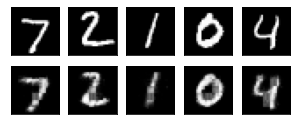

Epoch:7 , Loss:0.0268


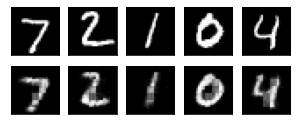

Epoch:8 , Loss:0.0262


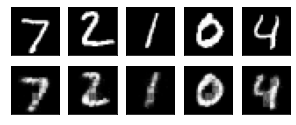

Epoch:8 , Loss:0.0259


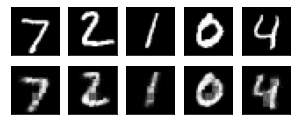

Epoch:8 , Loss:0.0269


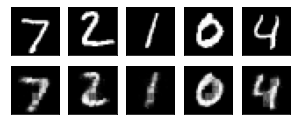

Epoch:8 , Loss:0.0259


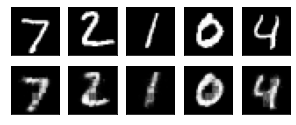

Epoch:8 , Loss:0.0266


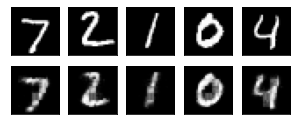

Epoch:8 , Loss:0.0259


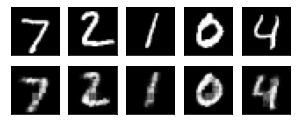

Epoch:9 , Loss:0.0260


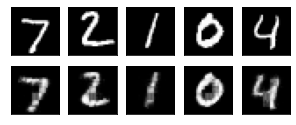

Epoch:9 , Loss:0.0268


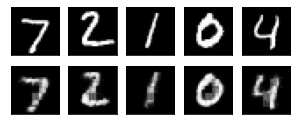

Epoch:9 , Loss:0.0253


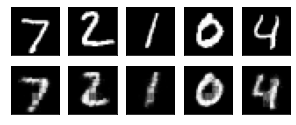

Epoch:9 , Loss:0.0246


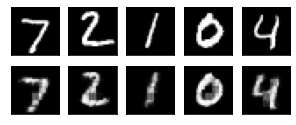

Epoch:9 , Loss:0.0248


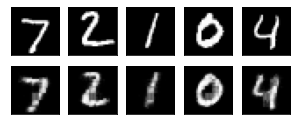

Epoch:9 , Loss:0.0259


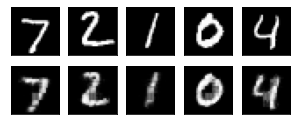

Epoch:10 , Loss:0.0248


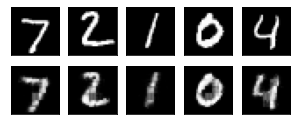

Epoch:10 , Loss:0.0239


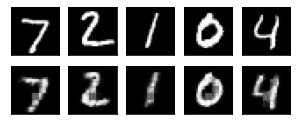

Epoch:10 , Loss:0.0237


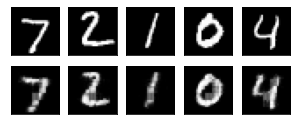

Epoch:10 , Loss:0.0251


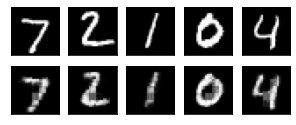

Epoch:10 , Loss:0.0242


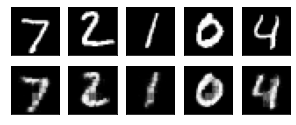

Epoch:10 , Loss:0.0242


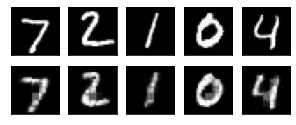

In [37]:
'''
只經過decoded
'''
for epoch in range(num_epochs):
  for i ,(x,y) in enumerate(train_loader):
    b_x = Variable(x).cuda()
    b_y = Variable(x).cuda()
    b_labels = Variable(y)

    optimizer.zero_grad()
    encoded , decoded = autoencoderCNN(b_x)
    loss = loss_fn(decoded, b_y)
    loss.backward()
    optimizer.step()
    if (i)%100 == 0:
      print("Epoch:%d , Loss:%0.4f"%(epoch+1,loss.data))
      _, decoded_data = autoencoderCNN(view_data)
      f, a = plt.subplots(2,num_test_img, figsize=(5,2))
      for j in range(num_test_img):
        a[0][j].imshow(np.reshape(view_data.data.cpu().numpy()[j],(28,28)),cmap='gray')
        a[0][j].set_xticks(())
        a[0][j].set_yticks(())

        a[1][j].imshow(np.reshape(decoded_data.data.cpu().numpy()[j],(28,28)),cmap='gray')
        a[1][j].set_xticks(())
        a[1][j].set_yticks(())
      
      plt.draw()
      plt.show()